In [5]:
class ZeroCouponBonds:
    def __init__(self, principal, maturity, interest_rate):
        self.principal = principal
        self.maturity = maturity
        self.interest_rate = interest_rate / 100
    def present_value(self,x,n):
        return x/(1+self.interest_rate)**n
    def calculate_price(self):
        return self.present_value(self.principal, self.maturity)
if __name__ == '__main__':
    bond = ZeroCouponBonds(1000,2,4)
    print("price of the bond in dollars: %.2f" % bond.calculate_price())
    

price of the bond in dollars: 924.56


In [6]:
class CouponBonds:
    def __init__(self, principal, rate, maturity, interest_rate):
        self.principal = principal
        self.rate = rate / 100
        self.maturity = maturity
        self.interest_rate = interest_rate / 100
    def present_value(self,x,n):
        return x/(1+self.interest_rate)**n
    def calculate_price(self):
        price = 0
        for t in range (1,self.maturity+1):
            price = price + self.present_value(self.principal * self.rate, t)
        price = price + self.present_value(self.principal, self.maturity)
        return price
if __name__ == '__main__':
    bond = CouponBonds(1000,10,3,4)
    print("price of the bond in dollars: %.2f" % bond.calculate_price())
    

price of the bond in dollars: 1166.51


In [5]:
import numpy as np
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import scipy.optimize as optimization
# stocks we are going to habdle
stocks = ['AAPL', 'WMT', 'TSLA', 'GE', 'AMZN', 'DB']
# historical data - start and end dates
start_date = '2012-01-01'
end_date = '2017-01-01'
def download_data():
    stock_data = {}
    for stock in stocks:
        ticker = yf.Ticker(stock)
        stock_data[stock] = ticker.history(start = start_date, end = end_date)['Close']
    return pd.DataFrame(stock_data)
if __name__=='__main__':
    print(download_data())

                                AAPL        WMT       TSLA          GE  \
Date                                                                     
2012-01-03 00:00:00-05:00  12.359180  15.220222   1.872000   67.937836   
2012-01-04 00:00:00-05:00  12.425602  15.063805   1.847333   68.677887   
2012-01-05 00:00:00-05:00  12.563550  14.990644   1.808000   68.640892   
2012-01-06 00:00:00-05:00  12.694887  14.884689   1.794000   69.010918   
2012-01-09 00:00:00-05:00  12.674753  14.930095   1.816667   69.788002   
...                              ...        ...        ...         ...   
2016-12-23 00:00:00-05:00  26.912704  19.967768  14.222667  139.558899   
2016-12-27 00:00:00-05:00  27.083622  20.013716  14.635333  139.646484   
2016-12-28 00:00:00-05:00  26.968142  19.901726  14.649333  138.770950   
2016-12-29 00:00:00-05:00  26.961208  19.887375  14.312000  138.814728   
2016-12-30 00:00:00-05:00  26.751024  19.847166  14.246000  138.333252   

                                AMZN 

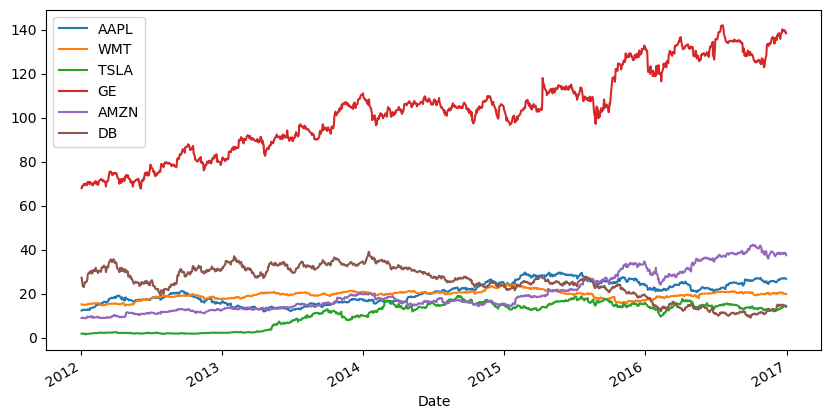

In [6]:
import numpy as np
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import scipy.optimize as optimization
# stocks we are going to habdle
stocks = ['AAPL', 'WMT', 'TSLA', 'GE', 'AMZN', 'DB']
# historical data - start and end dates
start_date = '2012-01-01'
end_date = '2017-01-01'
def download_data():
    stock_data = {}
    for stock in stocks:
        ticker = yf.Ticker(stock)
        stock_data[stock] = ticker.history(start = start_date, end = end_date)['Close']
    return pd.DataFrame(stock_data)

def show_data(data):
    data.plot(figsize=(10,5))
    plt.show()
    
if __name__=='__main__':
    show_data(download_data())

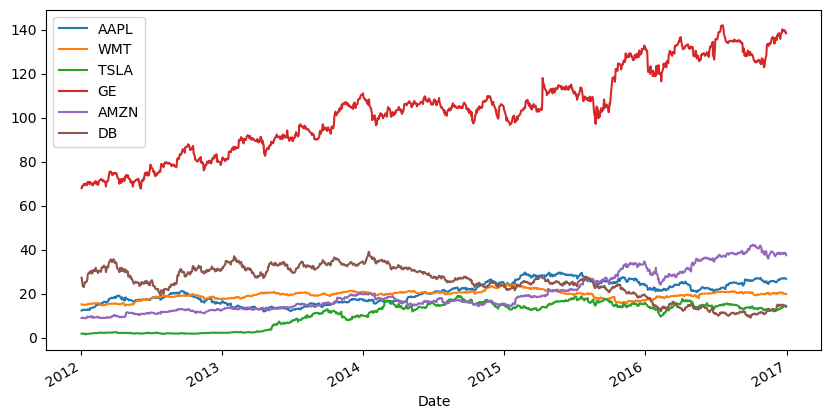

In [7]:
stocks = ['AAPL', 'WMT', 'TSLA', 'GE', 'AMZN', 'DB']
# historical data - start and end dates
start_date = '2012-01-01'
end_date = '2017-01-01'
def download_data():
    stock_data = {}
    for stock in stocks:
        ticker = yf.Ticker(stock)
        stock_data[stock] = ticker.history(start = start_date, end = end_date)['Close']
    return pd.DataFrame(stock_data)

def show_data(data):
    data.plot(figsize=(10,5))
    plt.show()
    
if __name__=='__main__':
    show_data(download_data())

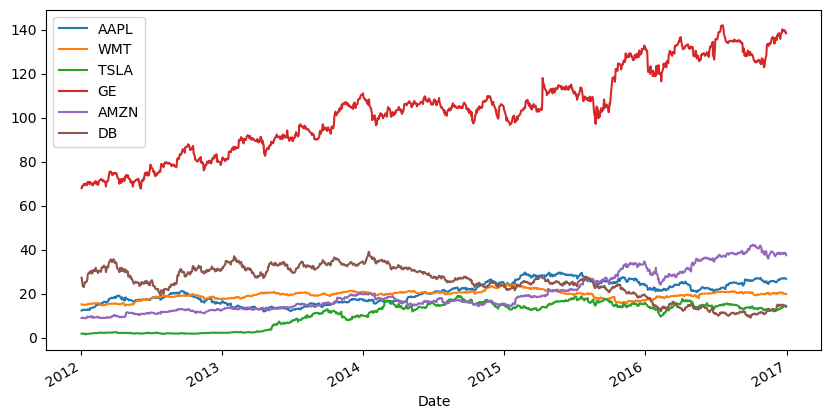

AAPL    0.154803
WMT     0.053214
TSLA    0.406862
GE      0.142554
AMZN    0.287153
DB     -0.128913
dtype: float64
          AAPL       WMT      TSLA        GE      AMZN        DB
AAPL  0.068351  0.008142  0.025434  0.014196  0.019009  0.024571
WMT   0.008142  0.028017  0.010265  0.009221  0.008545  0.013247
TSLA  0.025434  0.010265  0.252700  0.019334  0.041774  0.039047
GE    0.014196  0.009221  0.019334  0.032647  0.018026  0.031347
AMZN  0.019009  0.008545  0.041774  0.018026  0.094476  0.031574
DB    0.024571  0.013247  0.039047  0.031347  0.031574  0.139114


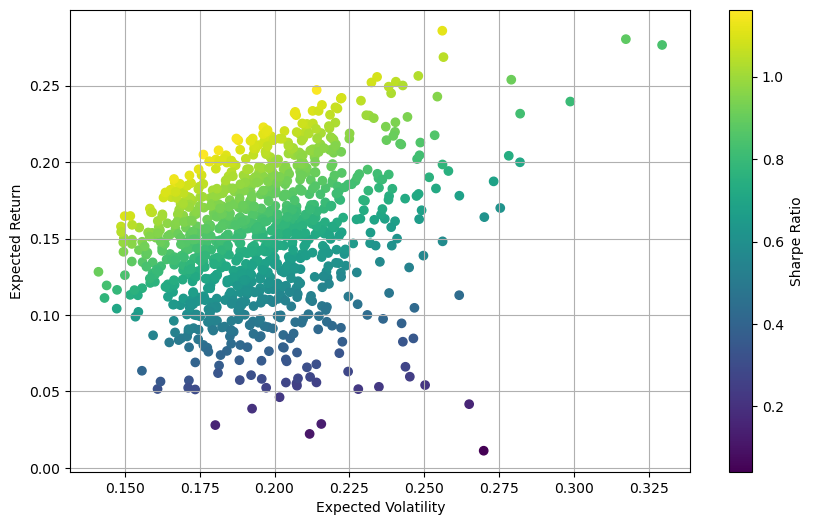

Optimal portfolio: [0.139 0.    0.166 0.374 0.321 0.   ]
Expected return, volatility and sharpe ratio: [0.23454811 0.19522413 1.20142994]


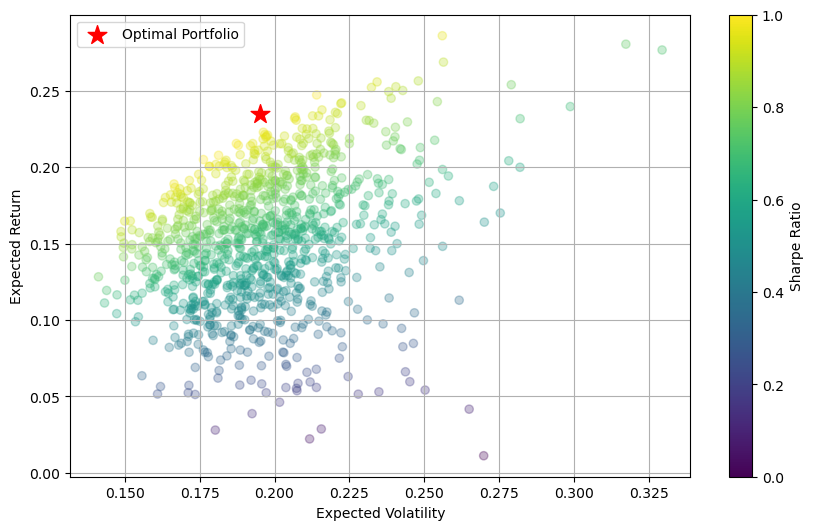

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
NUM_TRADING_DAYS = 252
NUM_PORTFOLIOS = 1000
stocks = ['AAPL', 'WMT', 'TSLA', 'GE', 'AMZN', 'DB']
# historical data - start and end dates
start_date = '2012-01-01'
end_date = '2017-01-01'
def download_data():
    stock_data = {}
    for stock in stocks:
        ticker = yf.Ticker(stock)
        stock_data[stock] = ticker.history(start = start_date, end = end_date)['Close']
    return pd.DataFrame(stock_data)

def show_data(data):
    data.plot(figsize=(10,5))
    plt.show()

def calculate_return(data):
    log_return = np.log(data/data.shift(1))
    return log_return[1:]

def show_statistics(returns):
    print(returns.mean() * NUM_TRADING_DAYS)
    print(returns.cov() * NUM_TRADING_DAYS)

def show_mean_variance(returns, weights):
    portfolio_return = np.sum(returns.mean()*weights)*NUM_TRADING_DAYS
    portfolio_volatility = np.sqrt(np.dot(weights.T, np.dot(returns.cov() * NUM_TRADING_DAYS, weights)))
    print("Expected portfolio mean (return):", portfolio_return)
    print("Expected portfolio volatility (standard deviation):", portfolio_volatility)

def generate_portfolios(returns):
    portfolio_means = []
    portfolio_risks = []
    portfolio_weights =[]

    for _ in range(NUM_PORTFOLIOS):
        w = np.random.random(len(stocks))
        w/=np.sum(w)
        portfolio_weights.append(w)
        portfolio_means.append(np.dot(returns.mean(), w)*NUM_TRADING_DAYS)
        portfolio_risks.append(np.sqrt(np.dot(w.T,np.dot(returns.cov()*NUM_TRADING_DAYS, w))))

    return np.array(portfolio_weights), np.array(portfolio_means), np.array(portfolio_risks)

def show_portfolios(returns, volatilities):
    plt.figure(figsize=(10,6))
    plt.scatter(volatilities, returns, c=(returns)/volatilities, marker='o')
    plt.grid(True)
    plt.xlabel('Expected Volatility')
    plt.ylabel('Expected Return')
    plt.colorbar(label='Sharpe Ratio')
    plt.show()

def statistics(weights, returns):
    portfolio_return = np.dot(returns.mean(), weights)*NUM_TRADING_DAYS
    portfolio_volatility = np.sqrt(np.dot(weights.T,np.dot(returns.cov()*NUM_TRADING_DAYS, weights)))
    return np.array([portfolio_return, portfolio_volatility, portfolio_return/portfolio_volatility])

def min_function_sharpe(weights,returns):
    return -statistics(weights, returns)[2]

def optimize_portfolio(weights, returns):
    constraints = {'type': 'eq', 'fun': lambda x: np.sum(x)-1}
    bounds = tuple((0,1) for _ in range(len(stocks)))
    return optimization.minimize(fun = min_function_sharpe, x0=weights[0], args = returns, method='SLSQP', bounds = bounds, constraints=constraints)

def print_optimal_portfolio(optimum, returns):
    print("Optimal portfolio:",optimum['x'].round(3))
    print("Expected return, volatility and sharpe ratio:",statistics(optimum['x'].round(3),returns))

def show_optimal_portfolio(optimum, returns, means, risks):
    optimal_weights = optimum['x']
    ret = np.sum(returns.mean() * optimal_weights) * NUM_TRADING_DAYS
    vol = np.sqrt(np.dot(optimal_weights.T, np.dot(returns.cov() * NUM_TRADING_DAYS, optimal_weights)))

    plt.figure(figsize=(10,6))
    plt.scatter(risks, means, c=means/risks, marker='o', alpha=0.3)
    plt.scatter(vol, ret, color='red', marker='*', s=200, label='Optimal Portfolio')
    plt.xlabel('Expected Volatility')
    plt.ylabel('Expected Return')
    plt.colorbar(label='Sharpe Ratio')
    plt.legend()
    plt.grid(True)
    plt.show()

if __name__=='__main__':
    dataset = download_data()
    show_data(dataset)
    log_daily_returns = calculate_return(dataset)
    show_statistics(log_daily_returns)

    pweights, means, risks = generate_portfolios(log_daily_returns)
    show_portfolios(means,risks)
    optimum = optimize_portfolio(pweights, log_daily_returns)
    print_optimal_portfolio(optimum, log_daily_returns)
    show_optimal_portfolio(optimum, log_daily_returns, means, risks)